In [2]:
import kagglehub
import pandas as pd
import os
# Download latest version
#downloads and returns the path to folder containing the dataset
path = kagglehub.dataset_download("phileinsophos/predict-loan-amount-data")

print("Path to dataset files:", path)

# List all files in the directory to find the CSV
files = os.listdir(path)
print("Files in dataset folder:", files)

# Assuming there's a CSV file in the dataset folder
#goes through all the files and gets the first csv file
csv_file = [f for f in files if f.endswith('.csv')][0]  # get first .csv file

# Load the CSV file
#form the path by joining path and csv_file
df = pd.read_csv(os.path.join(path, csv_file))

# Print the first 5 rows
print(df.head())

100%|██████████| 2.44M/2.44M [00:00<00:00, 128MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/phileinsophos/predict-loan-amount-data/versions/1
Files in dataset folder: ['train.csv', 'test.csv']


  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit C

Preprocess Steps

1.handle missing values

In [3]:
#drops any rows with missing values
df=df.dropna()

Encode Categorical Variables

In [4]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
  la=LabelEncoder()
  #Learns from the data (with .fit()) and then transforms it in one step.
  df[col]=la.fit_transform(df[col])

Standardize the features

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#getting numerical columns
numerical_cols=df.select_dtypes(include=['float64','int64']).columns.tolist()

target_col='Loan Sanction Amount (USD)'

if target_col in numerical_cols:
  numerical_cols.remove(target_col)

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [6]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
5,-1.301282,1.020932,-1.003861,1.481391,-0.099658,0.0,-0.406537,1.595563,-1.762246,-0.915802,...,-0.680820,2.035569,0.028548,-0.044575,-0.099658,-0.405276,-1.202139,0.066152,-0.959659,22382.57
6,-0.965690,0.783624,0.996154,0.346755,-0.022192,0.0,0.722941,0.033263,0.162413,1.119959,...,-1.349522,-0.491263,1.249137,-0.964091,-0.022192,-1.304363,0.040798,0.066152,0.997607,0.00
8,-0.800656,-0.015076,-1.003861,0.013038,-0.095453,0.0,0.722941,-1.305852,-1.762246,-0.903613,...,-0.378526,2.035569,-1.192041,-0.915329,-0.095453,1.392897,-1.202139,0.066152,-0.830315,22842.29
9,-0.906766,-1.420742,0.996154,-1.321828,-0.078257,0.0,0.722941,0.033263,-1.762246,-0.783850,...,-1.692940,-0.491263,1.249137,1.320768,-0.078257,-0.405276,1.283735,0.066152,-0.686301,0.00
10,0.521457,0.132234,0.996154,-1.321828,-0.018390,0.0,-0.406537,-1.082666,0.162413,-1.065201,...,-1.133618,-0.491263,-1.192041,-0.622756,-0.018390,-0.405276,-1.202139,0.066152,-1.077633,16747.72


In [7]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Customer ID','Name','Loan Sanction Amount (USD)'])
y=df[target_col]


# Split: 60% Train, 20% Validation, 20% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

print("Training set size :", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size      :", X_test.shape)

Training set size : (9030, 21)
Validation set size: (3010, 21)
Test set size      : (3010, 21)


Train the linear regression

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluating the model

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {label} Evaluation:")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2  : {r2:.4f}")

# Predictions
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Evaluation
evaluate_model(y_val, y_pred_val, "Validation Set")
evaluate_model(y_test, y_pred_test, "Test Set")


📊 Validation Set Evaluation:
MAE : 24280.3314
MSE : 1088594918.8147
RMSE: 32993.8618
R2  : 0.5210

📊 Test Set Evaluation:
MAE : 24467.5755
MSE : 1116151387.1923
RMSE: 33408.8519
R2  : 0.5006


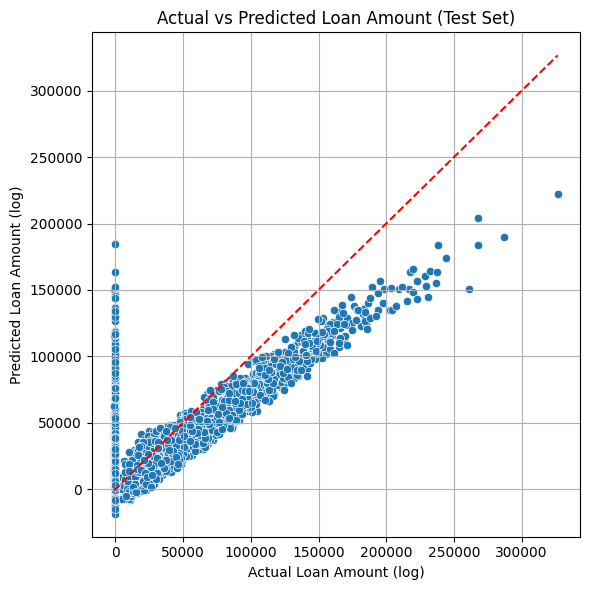

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # diagonal line
plt.xlabel("Actual Loan Amount (log)")
plt.ylabel("Predicted Loan Amount (log)")
plt.title("Actual vs Predicted Loan Amount (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  # or use your model

# Assume X and y are your features and target
# Example: X = df.drop('LoanAmount_log', axis=1), y = df['LoanAmount_log']

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# To store results
results = {
    'Fold': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2Score': []
}

fold = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    # Save to results
    results['Fold'].append(f"Fold {fold}")
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2Score'].append(r2)
    fold += 1

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Add average row
avg_row = pd.DataFrame({
    'Fold': ['Average'],
    'MAE': [results_df['MAE'].mean()],
    'MSE': [results_df['MSE'].mean()],
    'RMSE': [results_df['RMSE'].mean()],
    'R2Score': [results_df['R2Score'].mean()]
})
results_df = pd.concat([results_df, avg_row], ignore_index=True)

# Display the results table
print("Table 1: Cross-Validation Results (K = 5)")
print(results_df.to_string(index=False))


Table 1: Cross-Validation Results (K = 5)
   Fold          MAE          MSE         RMSE  R2Score
 Fold 1 24431.315023 1.114843e+09 33389.264948 0.501136
 Fold 2 24431.674079 1.079275e+09 32852.324155 0.523878
 Fold 3 24662.801062 1.099739e+09 33162.316274 0.502190
 Fold 4 24016.585977 1.058983e+09 32542.012452 0.522245
 Fold 5 24873.626231 1.171353e+09 34225.037068 0.474413
Average 24483.200474 1.104839e+09 33234.190979 0.504773


Correlation Heatmap

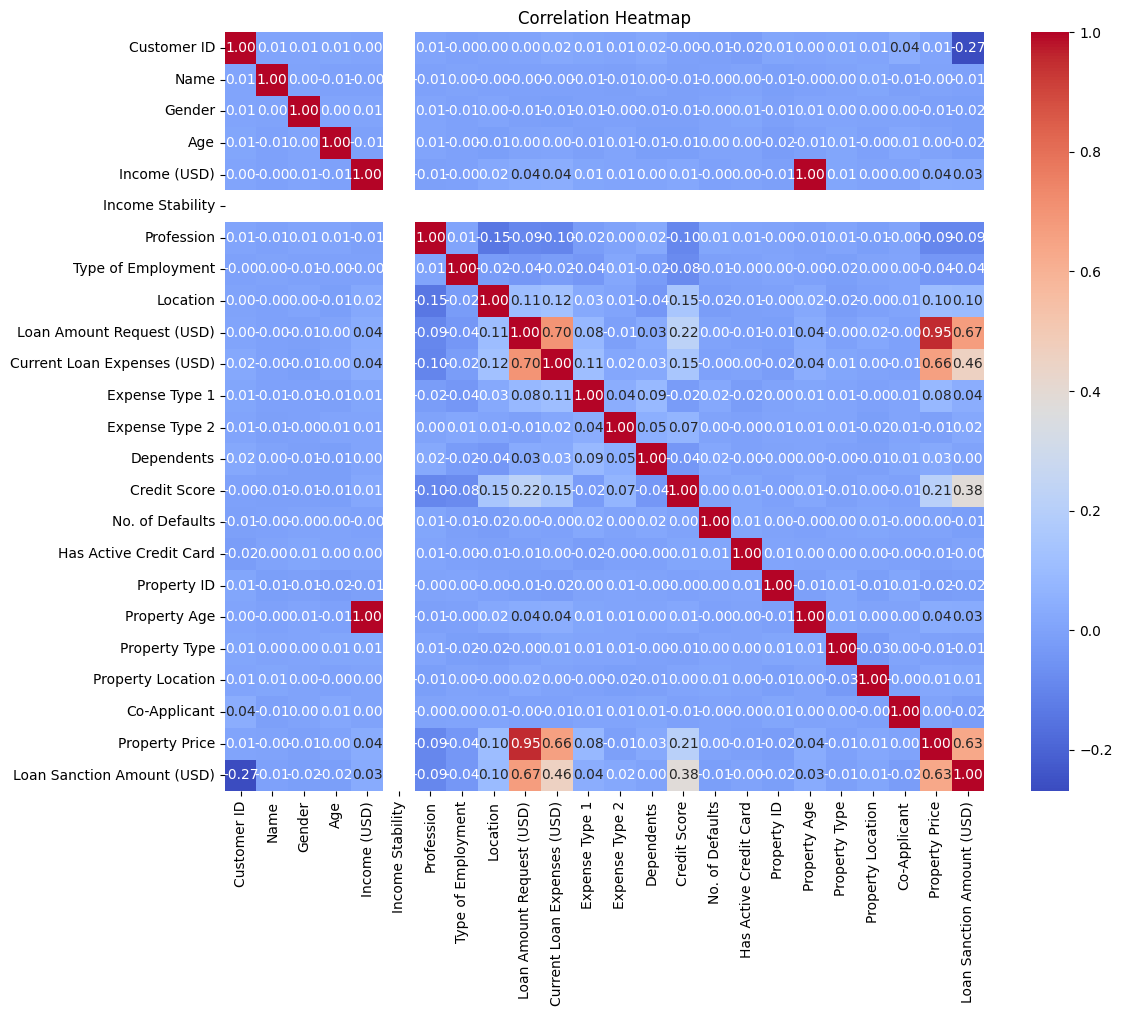

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)  # Ensure non-numeric columns are excluded
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()